# UGR'16 dataset brief analysis

* **Author:** Patrik Goldschmidt (igoldschmidt@fit.vut.cz)
* **Project:** Network Intrusion Datasets: A Survey, Limitations, and Recommendations
* **Date:** 2022, 2024

This analysis was also performed as a part of an other project, so its structure may be different from other notebooks.

Dataset homepage:
- https://nesg.ugr.es/nesg-ugr16/index.php

Dataset paper:
- https://nesg.ugr.es/nesg-ugr16/dataset_AuthorVersionFinal.pdf

This analysis uses the following subsets:
- https://nesg.ugr.es/nesg-ugr16/march_week3.php#INI
- https://nesg.ugr.es/nesg-ugr16/may_week1.php#INI

In [1]:
# Imports and settings
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.precision", 4)
pd.set_option('display.max_columns', None)

## Dataset features

In [2]:
# Column names as derived from the UGR'16 dataset documentation
colnames = ['te',  # timestamp of the end of the flow
            'td',  # duration of the flow
            'sa',  # source IP address
            'da',  # destination IP address
            'sp',  # source port
            'dp',  # destination port
            'pro', # L4 protocol
            'flg', # flags
            'fwd', # forwarding status
            'tos', # type of service
            'pkt', # number of packets exchanged in the flow
            'byt', # number of bytes exchanged in the flow
            'label']

## Dataset attacks span information example

Each week is provided with a CSV file with timestamps defining when is which attack happening

Example of a timestamps file for March, week 3rd

In [3]:
# Read the attacks timestamp information
ugr_times = pd.read_csv('attack_ts_march_week3.csv')

In [4]:
# See a few dataset timing fields
ugr_times.head()

,Unnamed: 0,counter(mins),Dos,scan44,scan11,nerisbotnet,blacklist,anomaly-udpscan,anomaly-sshscan,anomaly-spam
0,2016-03-18 10:47:00,0,0,0,0,0,0,0,0,0
1,2016-03-18 10:48:00,1,0,0,0,0,0,0,0,0
2,2016-03-18 10:49:00,2,0,0,0,0,0,0,0,0
3,2016-03-18 10:50:00,3,0,0,0,0,0,0,0,0
4,2016-03-18 10:51:00,4,0,0,0,0,0,0,0,0


In [5]:
ugr_times.tail()

,Unnamed: 0,counter(mins),Dos,scan44,scan11,nerisbotnet,blacklist,anomaly-udpscan,anomaly-sshscan,anomaly-spam
3668,2016-03-20 23:55:00,3668,0,0,0,0,1,0,0,0
3669,2016-03-20 23:56:00,3669,0,0,0,0,1,0,0,0
3670,2016-03-20 23:57:00,3670,0,0,0,0,1,0,0,0
3671,2016-03-20 23:58:00,3671,0,0,0,0,1,0,0,0
3672,2016-03-20 23:59:00,3672,0,0,0,0,1,0,0,0


As it can be seen, dataset from 3rd week of March spans somewhat over 2 and half days.

## 3rd Week of March Dataset Analysis

In [6]:
dset_name = 'march.week3.csv.uniqblacklistremoved'
subset_name = 'march.week3_sub.csv'

In [7]:
!wc -l $dset_name

240669887 march.week3.csv.uniqblacklistremoved


The dataset itself is too big, lets select first 1 000 000 samples for a brief analysis

In [8]:
!head -n 1000000 $dset_name > $subset_name

In [9]:
ugr = pd.read_csv(subset_name, names=colnames)

# The dataset is so big that trying to load whole dataset crashes the Jupyter Lab instance
#ugr = pd.read_csv(dset_name)

### Basic exploratory analysis

In [10]:
ugr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   te      999999 non-null  object 
 1   td      999999 non-null  float64
 2   sa      999999 non-null  object 
 3   da      999999 non-null  object 
 4   sp      999999 non-null  int64  
 5   dp      999999 non-null  int64  
 6   pro     999999 non-null  object 
 7   flg     999999 non-null  object 
 8   fwd     999999 non-null  int64  
 9   tos     999999 non-null  int64  
 10  pkt     999999 non-null  int64  
 11  byt     999999 non-null  int64  
 12  label   999999 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 99.2+ MB


In [11]:
ugr.shape

(999999, 13)

In [12]:
ugr.head()

,te,td,sa,da,sp,dp,pro,flg,fwd,tos,pkt,byt,label
0,2016-03-18 10:52:40,0.0,127.204.60.89,42.219.153.89,123,425,UDP,.A....,0,0,1,76,background
1,2016-03-18 10:52:40,0.0,143.72.8.137,42.219.154.108,53,41294,UDP,.A....,0,0,1,140,background
2,2016-03-18 10:52:40,0.0,143.72.8.137,42.219.154.108,53,46784,UDP,.A....,0,0,1,141,background
3,2016-03-18 10:52:40,0.0,143.72.8.137,42.219.158.161,53,35972,UDP,.A....,0,0,1,113,background
4,2016-03-18 10:52:40,0.0,143.72.8.137,42.219.158.164,53,41853,UDP,.A....,0,0,1,103,background


In [13]:
ugr.describe()

,td,sp,dp,fwd,tos,pkt,byt
count,999999.0000,999999.000,999999.0000,999999.0,999999.0000,999999.0000,1.0000e+06
mean,3.8027,27394.080,16862.7451,0.0,15.7055,21.2618,1.1405e+04
std,23.1971,24296.331,23516.5037,0.0,24.4813,818.5496,9.0144e+05
min,0.0000,0.000,0.0000,0.0,0.0000,1.0000,2.6000e+01
25%,0.0000,443.000,80.0000,0.0,0.0000,1.0000,8.0000e+01
50%,0.0520,30523.000,443.0000,0.0,0.0000,2.0000,1.9600e+02
75%,1.3160,50934.000,41794.0000,0.0,40.0000,8.0000,1.0630e+03
max,312.9480,65535.000,65535.0000,0.0,224.0000,300410.0000,4.5059e+08


In [14]:
# Determine if theere may be any NaN values to guess the dataset quality
ugr.isnull().sum().sum()

0

#### Information about labels

<AxesSubplot:xlabel='label', ylabel='count'>

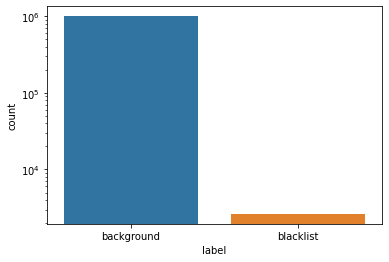

In [15]:
sns.countplot(x='label', data=ugr, log=True)

In [16]:
ugr.groupby(by='label').count()['te']

label
background    997366
blacklist       2633
Name: te, dtype: int64

#### Information about protocol shares

In [17]:
# Existing protocols and their ratios within the dataset
(ugr.groupby('pro').count()['label'] / len(ugr)).round(4)

pro
ESP     0.0006
GRE     0.0006
ICMP    0.0102
IPIP    0.0001
IPv6    0.0000
TCP     0.6178
UDP     0.3707
Name: label, dtype: float64

Let's try to look at the end of the data

In [18]:
!tail -n 1000000 $dset_name > dset_tail.csv
ugrt = pd.read_csv('dset_tail.csv', names=colnames)

In [19]:
ugrt.groupby(by='label').count()['te']

label
background    997221
blacklist       2779
Name: te, dtype: int64

There are only blacklists and background labels in the first and last 1M flows in the 3rd March dataset subset.

## 1st week of August Dataset Analysis

In [20]:
dset_name = 'august.week1.csv'
attacks_file = 'aug1_attacks.csv'

In [21]:
!wc -l $dset_name

851614543 august.week1.csv


This is again extremely big (77GB after unzipping), use regex filters to select non-background traffic only

In [22]:
!cat $dset_name | grep -v 'background' > $attacks_file

In [23]:
ugr_att = pd.read_csv(attacks_file, names=colnames)

In [24]:
# Number of extracted non-background entries in the 1st week of august
len(ugr_att)

40526401

_Note: There is also a possibility to download only flows from the particular attacks, so this manual cleansing does not need to be made_

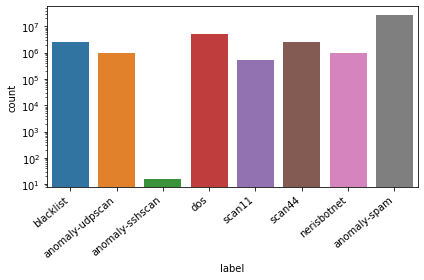

In [25]:
ax = sns.countplot(x='label', data=ugr_att, log=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [26]:
ugr_att.groupby(by='label').count()['te']

label
anomaly-spam       27970000
anomaly-sshscan          16
anomaly-udpscan      989872
blacklist           2464585
dos                 5093132
nerisbotnet          992575
scan11               539018
scan44              2477203
Name: te, dtype: int64

_Note: This is not a a comprehensive list of attacks, as only 1st week from August is taken, and some attacks are also reported in other weeks_

### Timestamps analysis
There is often a problem with correct timestamping in NIDS datasets. Let's have a brief look whether the timestamps in this dataset correspond to ones declared in the documentation and the separate file.

According to the dataset paper, new attack batch should start at Mon, 08/01/2016 08:00. Let's see the timestamps file if this is true.

In [27]:
tstamps_file = 'attack_ts_august_week1.csv'

In [28]:
tstamps = pd.read_csv(tstamps_file)

In [29]:
tstamps.head()

,Unnamed: 0,counter(mins),Dos,scan44,scan11,nerisbotnet,blacklist,anomaly-udpscan,anomaly-sshscan,anomaly-spam
0,2016-08-01 00:00:00,6382,0,0,0,0,1,0,0,0
1,2016-08-01 00:01:00,6383,0,0,0,0,1,0,0,0
2,2016-08-01 00:02:00,6384,0,0,0,0,1,0,0,0
3,2016-08-01 00:03:00,6385,0,0,0,0,1,0,0,0
4,2016-08-01 00:04:00,6386,0,0,0,0,1,0,0,0


As it may be seen, the timestamp file starts at 2016-08-01 00:00:00 with some blacklist flows already marked. Let's try to get to 8:00 see if the attack vector changes.

60 minutes per hour * 8 hours

In [30]:
tstamps.iloc[60*8 - 5 : 60*8 + 5]

,Unnamed: 0,counter(mins),Dos,scan44,scan11,nerisbotnet,blacklist,anomaly-udpscan,anomaly-sshscan,anomaly-spam
475,2016-08-01 07:55:00,6857,0,0,0,0,1,0,0,0
476,2016-08-01 07:56:00,6858,0,0,0,0,1,0,0,0
477,2016-08-01 07:57:00,6859,0,0,0,0,1,0,0,0
478,2016-08-01 07:58:00,6860,0,0,0,0,1,0,0,0
479,2016-08-01 07:59:00,6861,1,0,0,0,1,0,0,0
480,2016-08-01 08:00:00,6862,1,0,0,0,1,0,0,0
481,2016-08-01 08:01:00,6863,1,0,0,0,1,0,0,0
482,2016-08-01 08:02:00,6864,1,0,0,0,1,0,0,0
483,2016-08-01 08:03:00,6865,0,0,0,0,1,0,0,0
484,2016-08-01 08:04:00,6866,0,0,0,0,1,0,0,0


Well, there is a change in DoS attack vector at 7:59, which is one minute sooner than declared in the documentation. According to the documentation, the DoS should last 3 minutes. In this example, it lasts 4 minutes, however, one should consider a fact when the attack started 1 second before 8:00, and thus the DoS mark was created. Let's check the actual flows if this corresponds.

In [31]:
ugr_att.loc[ugr_att['label'] == 'dos'].head()

,te,td,sa,da,sp,dp,pro,flg,fwd,tos,pkt,byt,label
1059523,2016-08-01 07:59:44,0.0,42.219.150.246,42.219.158.16,2195,80,TCP,....S.,0,0,1,160,dos
1059524,2016-08-01 07:59:44,0.0,42.219.150.246,42.219.158.16,2196,80,TCP,....S.,0,0,1,160,dos
1059525,2016-08-01 07:59:44,0.0,42.219.150.246,42.219.158.16,2197,80,TCP,....S.,0,0,1,160,dos
1059526,2016-08-01 07:59:44,0.0,42.219.150.246,42.219.158.16,2198,80,TCP,....S.,0,0,1,160,dos
1059527,2016-08-01 07:59:44,0.0,42.219.150.246,42.219.158.16,2199,80,TCP,....S.,0,0,1,160,dos


As apparent, the attack started 16 second before the declared time in the documentation. Now, let's see if it really lasts exactly 3 minutes as declared.

In [32]:
ugr_att.loc[ugr_att['label'] == 'dos'].iloc[35662 : 35666]

,te,td,sa,da,sp,dp,pro,flg,fwd,tos,pkt,byt,label
1095574,2016-08-01 08:02:44,0.004,42.219.150.246,42.219.158.16,20016,80,TCP,...RS.,0,0,2,200,dos
1095575,2016-08-01 08:02:44,0.004,42.219.150.246,42.219.158.16,20025,80,TCP,...RS.,0,0,2,200,dos
1096530,2016-08-01 08:09:44,0.000,42.219.150.242,42.219.152.20,2293,80,TCP,....S.,0,0,1,160,dos
1096531,2016-08-01 08:09:44,0.000,42.219.150.242,42.219.152.20,2294,80,TCP,....S.,0,0,1,160,dos


In this case, the exact 3 minute attack period was kept.

In [33]:
# Another interesting finding - the server's responses are marked as DoS as well, this could be problematic for classifiers
ugr_att.loc[ugr_att['label'] == 'dos'].tail()

,te,td,sa,da,sp,dp,pro,flg,fwd,tos,pkt,byt,label
37234995,2016-08-07 20:29:32,0.000,42.219.154.69,42.219.150.241,80,19921,TCP,.A..S.,0,0,1,40,dos
37234996,2016-08-07 20:29:32,0.000,42.219.154.69,42.219.150.241,80,19922,TCP,.A..S.,0,0,1,40,dos
37234997,2016-08-07 20:29:32,0.000,42.219.154.69,42.219.150.241,80,19923,TCP,.A..S.,0,0,1,40,dos
37234998,2016-08-07 20:29:32,0.004,42.219.150.241,42.219.154.69,19907,80,TCP,...RS.,0,0,2,200,dos
37234999,2016-08-07 20:29:32,0.004,42.219.150.241,42.219.154.69,19913,80,TCP,...RS.,0,0,2,200,dos


## Conclusions

- Dataset contains lot of data and is undoubtedly of an above-average quality
- It contains several amulated attacks and tons of background traffic with a few anomalies in it detected
   - These anomalies are marked as "anomaly-XXX"
- However, it can still contain a lot of attacks and anomalies that were undetected
- The provided scope of attacks is rather limited and it is questionable if provided Netflow data would be able to sufficiently distinguish between them when ML techniques would be used
- According to the brief analysis, some timestamps are slightly shifted than declared in the dataset's paper
   - Nevertheless, attached file with attack timestamps seems to be precise
- Only a very brief data exploration was performed here. If the dataset would be decided to be used, more effort would need to be put to understanding the data - e.g. pair plots, histograms, scatter plots of different features etc.
- During the biref analysis, answers to attacks (such as DoS) were marked as attacking flows as well. If this is the case for the whole dataset, classifiers trained on this data may be unable to classify the traffic properly or other actions would need to be made
   - This could be potentially mitigated by merging the flows and creating bidirectional ones, or completely ignoring the answers